# Team ID : PNT2022TMID34850
# Project Name : A Gesture-based Tool for Sterile Browsing ofRadiology Images

# Model Building

# ● Importing the Model Building libraries

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# ● Initializing the Model

In [2]:
classifier = Sequential()

# ● Adding CNN layers

In [3]:
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1) ,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())

# ● Adding Dense layers

In [4]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=6, activation='softmax'))

In [5]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

# ● Configure the Learning Process

In [6]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
x_train = train_datagen.flow_from_directory(r'D:\A Gesture-based Tool for Sterile Browsing of Radiology Images\Dataset\train', target_size=(64, 64), batch_size=5, color_mode='grayscale', class_mode='categorical')
x_test = test_datagen.flow_from_directory(r'D:\A Gesture-based Tool for Sterile Browsing of Radiology Images\Dataset\test', target_size=(64, 64), batch_size=5, color_mode='grayscale', class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [11]:
classifier.fit_generator(
    generator=x_train, steps_per_epoch=len(x_train),
    epochs=20, validation_data=x_test, validation_steps=len(x_test)
)

C:\Users\ELCOT\AppData\Local\Temp/ipykernel_6948/2617134232.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/20
119/119 [==============================] - 22s 125ms/step - loss: 1.4677 - accuracy: 0.4461 - val_loss: 0.7134 - val_accuracy: 0.7333
Epoch 2/20
119/119 [==============================] - 13s 108ms/step - loss: 0.7433 - accuracy: 0.7189 - val_loss: 0.3795 - val_accuracy: 0.9000
Epoch 3/20
119/119 [==============================] - 13s 113ms/step - loss: 0.4903 - accuracy: 0.8030 - val_loss: 0.4342 - val_accuracy: 0.8333
Epoch 4/20
119/119 [==============================] - 15s 126ms/step - loss: 0.4111 - accuracy: 0.8283 - val_loss: 0.4615 - val_accuracy: 0.9000
Epoch 5/20
119/119 [==============================] - 12s 104ms/step - loss: 0.2622 - accuracy: 0.9024 - val_loss: 0.4503 - val_accuracy: 0.8667
Epoch 6/20
119/119 [==============================] - 16s 136ms/step - loss: 0.2003 - accuracy: 0.9461 - val_loss: 0.2446 - val_accuracy: 0.9667
Epoch 7/20
119/119 [==============================] - 12s 99ms/step - loss: 0.1726 - accuracy: 0.9377 - val_loss: 0.2102 - val_acc

# ● Train the Model

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os

In [13]:
batch_size = 16

In [14]:
os.listdir("D:\A Gesture-based Tool for Sterile Browsing of Radiology Images\Dataset")

['test', 'train']

In [15]:
train_data = tf.keras.utils.image_dataset_from_directory(
  "D:\A Gesture-based Tool for Sterile Browsing of Radiology Images\Dataset",
  validation_split=0.25,
  subset="training",
  seed=120,
  image_size=(180, 180),
  batch_size=batch_size)

Found 624 files belonging to 2 classes.
Using 468 files for training.


In [16]:
val_data_set = tf.keras.utils.image_dataset_from_directory(
 "D:\A Gesture-based Tool for Sterile Browsing of Radiology Images\Dataset",
  validation_split=0.25,
  subset="validation",
  seed=120,
  image_size=(180, 180),
  batch_size=batch_size)

Found 624 files belonging to 2 classes.
Using 156 files for validation.


In [17]:
class_names = train_data.class_names

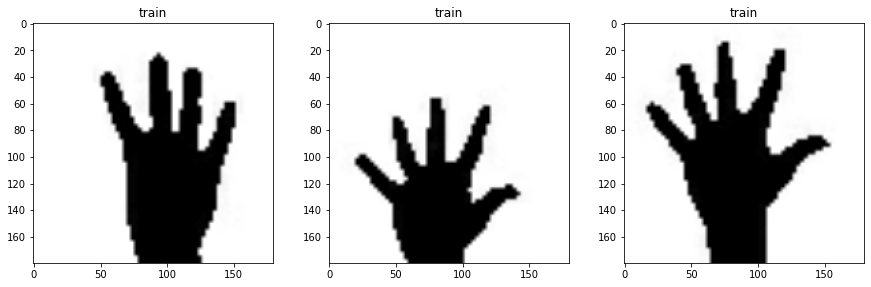

In [18]:
plt.figure(figsize=(15, 15))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

# ● Save the Model

In [19]:
classifier.save('gesture.h5')

In [20]:
model_json = classifier.to_json()
with open("model-bw.json", "w") as f:
    f.write(model_json)

# ● Test the Model

In [21]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image

In [22]:
model = load_model("gesture.h5")

In [23]:
from tensorflow.keras.utils import load_img, img_to_array

img = load_img("D:\A Gesture-based Tool for Sterile Browsing of Radiology Images/Dataset/test/0/0.jpg", grayscale=True, target_size=(64, 64))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = model.predict(x)

pred

C:\Users\ELCOT\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
pred[0]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [1]:
import numpy as np
p=[]
for i in range(0,6):
  for j in range(0,5):
    img = image.load_img(r"D:\\A Gesture-based Tool for Sterile Browsing of Radiology Images\\Dataset\test\\"+str(i)+"\\"+str(j)+".jpg", grayscale=True, target_size=(64,64))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = np.argmax(model.predict(x),axis=-1)
    p.append(pred)
print(p)

NameError: name 'image' is not defined